In [51]:
# 구글 코랩에서 pyplot이용시 한글쓰고 싶으면 그냥 실행해라...
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (21.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126209 files and direc

['.config', '연도별나라별방한외국인데이터(ANSI).csv', 'sample_data']
['2010', '그리스', '7975']
['2010', '남아프리카공화국', '9633']
['2010', '네덜란드', '22669']
['2010', '노르웨이', '12821']
['2010', '뉴질랜드', '26973']
['2010', '대만', '406352']
['2010', '덴마크', '7978']
['2010', '독일', '98119']
['2010', '러시아', '150730']
['2010', '루마니아', '8699']
['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
['카자흐스탄', '그리스', '몽골', '오스트레일리아', '아시아 기타', '이스라엘', '뉴질랜드', '포르투갈', '핀란드', '멕시코', '스웨덴', '스위스', '남아프리카공화국', '미국', '오세아니아 기타', '베트남', '루마니아', '불가리아', '일본', '이란', '캄보디아', '프랑스', '필리핀', '노르웨이', 'GCC', '네덜란드', '스페인', '스리랑카', '파키스탄', '싱가포르', '독일', '튀르키예', '말레이시아', '홍콩', '터키', '아일랜드', '중국', '호주', '덴마크', '브라질', '방글라데시', '러시아', '벨기에', '우즈베키스탄', '대만', '이탈리아', '인도네시아', '인도', '태국', '아프리카 기타', '미얀마', '오스트리아', '영국', '아메리카 기타', '크로아티아', '캐나다', '폴란드', '유럽 기타', '우크라이나', '마카오']
{'카자흐스탄': [7417, 8421, 11039, 13158, 21075, 29188, 34068, 44487, 52859, 52966, 10240, 7212, 30273, 4687

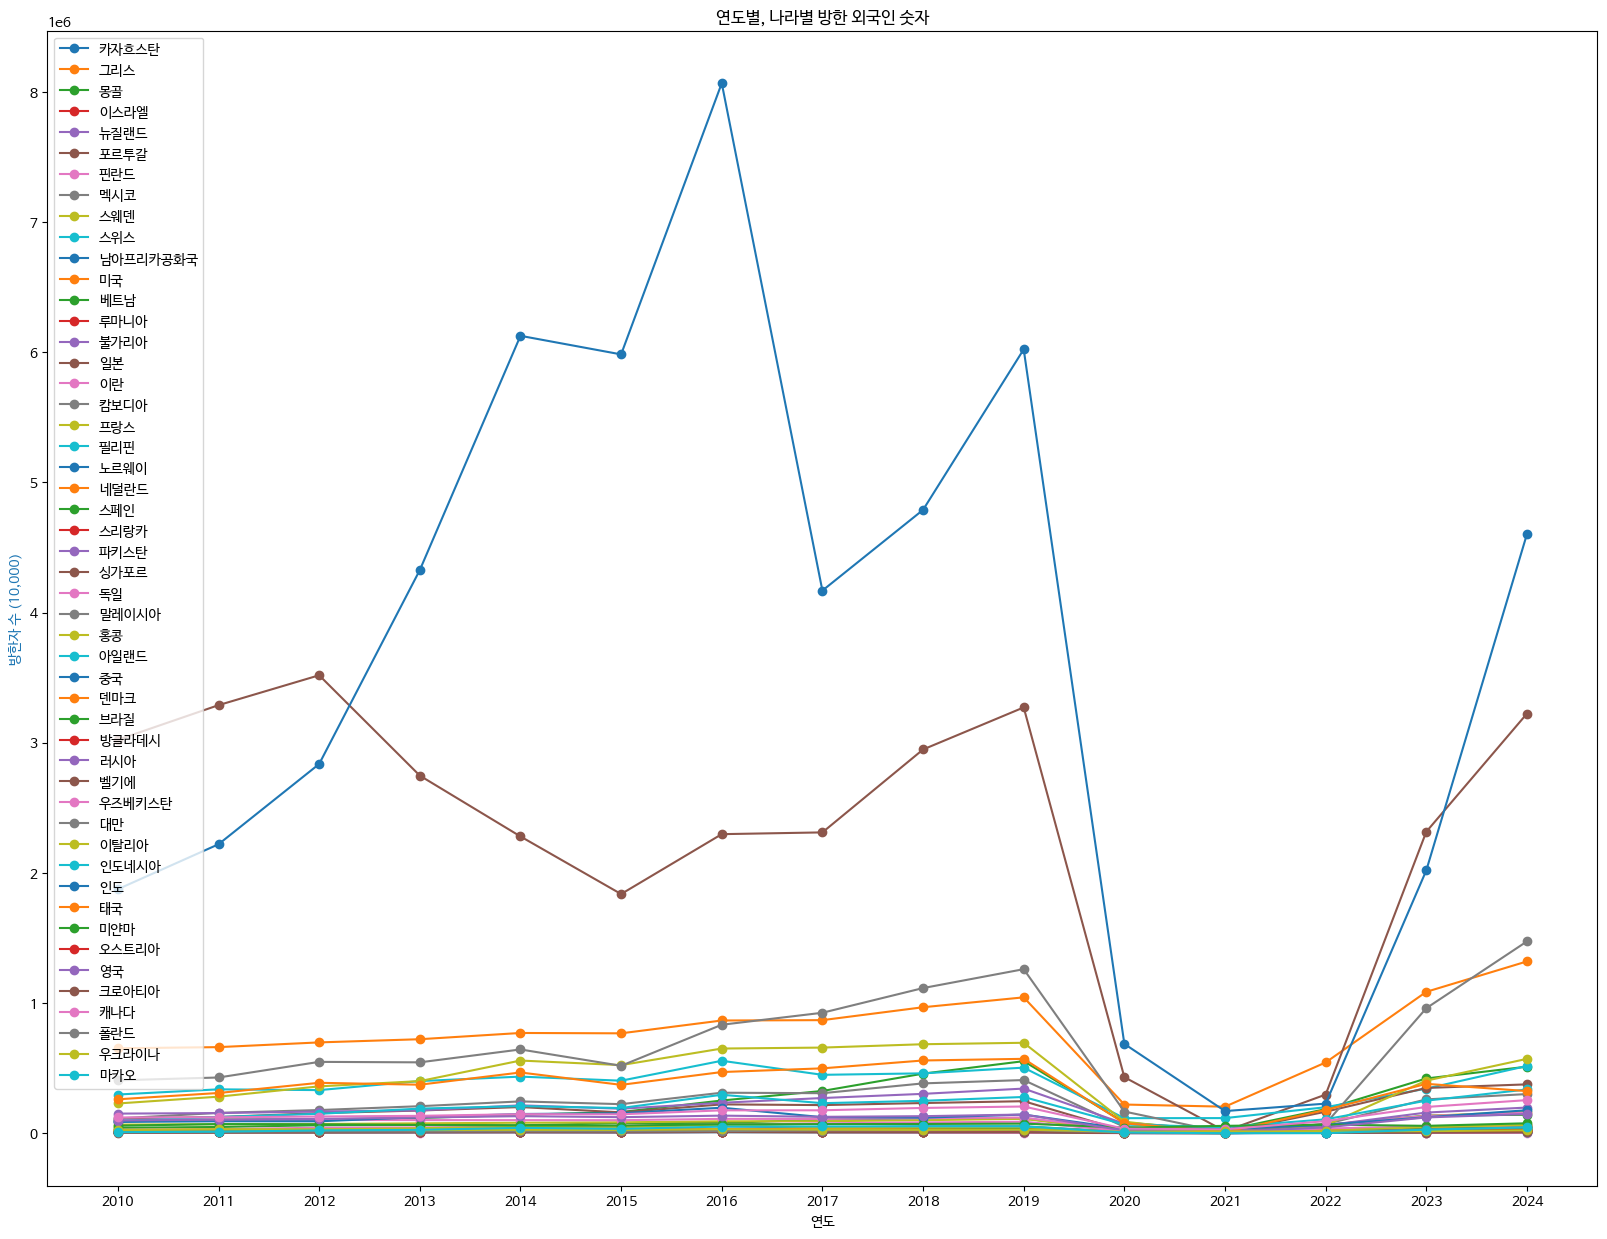

In [4]:
from google.colab import files
#import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.font_manager as fm
import os
import csv
files =  os.listdir('./')
print(files)

f = open(files[1], 'r', encoding='cp949')
f_reader = csv.reader(f)
csv_data = []
for line in f_reader:
  csv_data.append(line)

# 데이터 견본 엿보기
for i in range(10):
  print(csv_data[i])

years = []
countries = []
for i in range(len(csv_data)):
  years.append(csv_data[i][0])
  countries.append(csv_data[i][1])

# 혹시 있을 중복 제거후 오름차순으로 정렬
years = list(set(years))
years.sort()
countries = list(set(countries))
print(years)
print(countries)

visitors = {} # 키(나라이름(스트링)): 값(년단위 방문자 수 데이터(리스트))
for i in range(len(countries)):
  visitors_per_country = []
  for j in range(len(csv_data)):
    if csv_data[j][1] == countries[i]:
      visitors_per_country.append(int(csv_data[j][2])) # 원래 방문자수 데이터(String) -> int로 변환해서 저장
  visitors[countries[i]] = visitors_per_country # 딕셔너리에 데이터 삽입하기 / 키(나라): 값([나라에 해당하는 2010~2024년까지의 방문자 수 데이터])

print(visitors) # 방금 만든 딕셔너리 어떻게 생겨먹었는지 함 봐야지

plt.rc('font', family='NanumBarunGothic') # pyplot에 폰트 적용(한글 깨짐 극복)

fig, ax1 = plt.subplots(figsize=(20, 15)) # 그래프 사이즈 설정 (가로, 세로) 단위는 inch

# 나라마다 꺾은선 그래프 데이터 1개씩 생성
for country in countries:
  if len(visitors.get(country)) == len(years): # ValueError: x and y must have same first dimension 오류 발생 방지
    ax1.plot(years, visitors.get(country), marker='o', label=country)  # x축: 2010 2011 2012... / y축: visitors 딕셔너리의 키(나라이름)을 이용해 얻어낸 값(방문자 수 리스트) / 라벨: 나라이름

ax1.set_xlabel("연도") # x축 이름 설정
ax1.set_ylabel("방한자 수 (10,000)", color='tab:blue') # y축 이름 설정

# 제목 및 범례
plt.title("연도별, 나라별 방한 외국인 숫자") # 그래프 이름 설정
ax1.legend(loc="upper left") # 레이블 위치 설정

plt.show() # 그래프 인쇄
